<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/PRACTICE_OF_MAKE_AGENT_%26_MULTI_AGENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
%%capture --no-stderr
%pip install --q -U langgraph


In [69]:
from typing_extensions import TypedDict
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import display, Image


In [31]:
from typing import TypedDict

class naveed(TypedDict):
  input:str

In [70]:
def node_1(state:naveed)->naveed:
  print("node_1 state",state)
  return {"input":state + " i live in karachi"}

def node_2(state:naveed)->naveed:
  print("node_2 sate", state)
  return {"input":state["input"]+"and my institute is UIT Karachi"}

def node_3(state:naveed)->naveed: # Fixed: Function name changed from node_2 to node_3 to avoid redefinition.
  print("node_3 sate", state) # Fixed: Indented this line and the following line to be part of the function body.
  return {"input":state["input"]+"i have two kids"}

In [71]:
import random
from typing_extensions import Literal

random.random()
number: float = random.random()
if number < 0.5:
    print("go to node_2")
else:
    print("go to node_3")

def decide_mood(state: naveed) -> Literal["umaima", "aqsa"]:
    """
    This function decides the next node based on a random number.
    It now returns 'umaima' or 'aqsa', which are the names of the nodes in the graph.
    """
    if random.random() < 0.5:
        return "umaima"  # Changed from "node_2" to "umaima"
    else:
        return "aqsa"  # Changed from "node_3" to "aqsa"

go to node_3


In [72]:
# build graph
builder:StateGraph=StateGraph(state_schema=naveed)
builder.add_node("fatima",node_1) # Changed node_add to add_node
builder.add_node("umaima",node_2) # Changed node_add to add_node
builder.add_node("aqsa",node_3) # Changed node_add to add_node

In [73]:
builder.add_edge(START,"fatima")
builder.add_conditional_edges("fatima",decide_mood)
builder.add_edge("umaima",END)
builder.add_edge("aqsa",END)


In [74]:
graph = builder.compile()

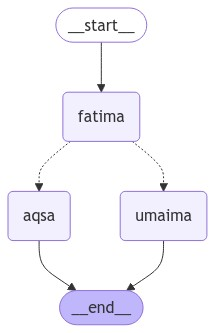

In [75]:
display(Image(graph.get_graph().draw_mermaid_png()))

go to node_2


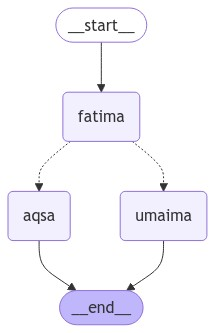

node_1 state {'input': 'Hi, this is fatima and now i i want to go umaima.'}
node_2 sate {'input': 'Hi, this is fatima and now i i want to go umaima. i live in karachi'}


{'input': 'Hi, this is fatima and now i i want to go umaima. i live in karachiand my institute is UIT Karachi'}

In [79]:
# prompt: plz solve of last prompt error

from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START, END
from langgraph.graph.state import CompiledStateGraph
from IPython.display import display, Image
from typing import TypedDict
import random
from typing_extensions import Literal



class naveed(TypedDict):
  input:str
def node_1(state:naveed)->naveed:
  print("node_1 state",state)
  return {"input":state["input"] + " i live in karachi"}

def node_2(state:naveed)->naveed:
  print("node_2 sate", state)
  return {"input":state["input"]+"and my institute is UIT Karachi"}

def node_3(state:naveed)->naveed:
  print("node_3 sate", state)
  return {"input":state["input"]+"i have two kids"}

random.random()
number: float = random.random()
if number < 0.5:
    print("go to node_2")
else:
    print("go to node_3")

def decide_mood(state: naveed) -> Literal["umaima", "aqsa"]:
    """
    This function decides the next node based on a random number.
    It now returns 'umaima' or 'aqsa', which are the names of the nodes in the graph.
    """
    if random.random() < 0.5:
        return "umaima"
    else:
        return "aqsa"

# build graph
builder:StateGraph=StateGraph(state_schema=naveed)
builder.add_node("fatima",node_1)
builder.add_node("umaima",node_2)
builder.add_node("aqsa",node_3)
builder.add_edge(START,"fatima")
builder.add_conditional_edges("fatima",decide_mood)
builder.add_edge("umaima",END)
builder.add_edge("aqsa",END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"input" : "Hi, this is fatima and now i i want to go umaima."})

In [80]:
graph.invoke({"input" : "ASSALAMUALYKUM."})

node_1 state {'input': 'ASSALAMUALYKUM.'}
node_3 sate {'input': 'ASSALAMUALYKUM. i live in karachi'}


{'input': 'ASSALAMUALYKUM. i live in karachii have two kids'}